# Un modèle formel de l'apprentissage ☕️☕️☕️☕️ (💆‍♂️)

**<span style='color:blue'> Objectifs de la séquence</span>** 
* Comprendre&nbsp;:
    * les principes liés à la minimisation du risque empirique,
    * les quantités qui entrent en jeu dans l'apprentissage et entraînent le sur-apprentissage,
    * les raisons qui peuvent rendrent l'apprentissage difficile.
    


 ----

## Introduction

La théorie de Vapnik et Chervonenkis, ou théorie VC, cherche à expliquer via des approches statistiques pourquoi l'apprentissage automatique fonctionne dans certains cas. Cette section du cours de *machine learning*, plus théorique, nous permettra de démontrer plusieurs résultats fondamentaux dans le cas d'un problème de classification binaire. Ces résultats se généralisent bien entendu à d'autres problèmes de *machine learning*.

Notons $\mathcal{X}\subseteq\mathbb{R}^d$ notre espace d'entrée de dimension $d$ et $\mathcal{Y}=\{0, 1\}$ l'espace de nos labels que nous restreindrons dans cette section au cas binaire. Notons $\mathcal{H}$ l'ensemble des fonctions de $\mathcal{X}$ dans $\mathcal{Y}$ parmi lesquelles nous voulons réaliser notre apprentissage. Comme toujours, notre objectif est de trouver une fonction $h\in\mathcal{H}$ qui fait peu d'erreur relativement au risque suivant&nbsp;:

$$L(h)=\mathbb{E}\big[\textbf{1}\{h(X)\neq Y\}\big]=\mathbb{P}\big(h(X)\neq Y\big).$$

C'est tout simplement la probabilité que notre fonction $h\in\mathcal{H}$ prédise le mauvais label pour un $X$ observé. Bien sûr, nous ne connaissons pas le processus générateurs de nos données ni le modèle probabiliste le décrivant. Pour cela, nous devons estimer ce risque en échantillonnant. Notons $S_n=\{(X_i, Y_i)\}_{i\leq n}\sim\mathbb{P}^n$ un jeu de données de taille $n$ où les couples sont iid. Nous pouvons maintenant utiliser ce jeu de données afin de déterminer empiriquement le risque de chaque fonction $h\in\mathcal{H}$ de la manière suivante :

$$L_n(h)=\frac{1}{n}\sum_i \textbf{1}\{h(X_i)\neq Y_i\}\text{ où }\mathbb{E}\big[L_n(h)\big]=L(h)$$

C'est juste le nombre moyen d'erreurs commises par la fonction $h$ sur le jeu de données $S_n$. Notre objectif devient donc :

$$h_n=\text{argmin}_{h\in\mathcal{H}}L_n(h),$$

où on appellera $h_n$ le minimiseur du risque empirique. C'est la fonction dans $\mathcal{H}$ qui fait le moins d'erreurs en moyenne sur notre jeu de données. On espère qu'elle ne fera pas non plus beaucoup d'erreurs sur le vrai risque $L$. Nous pouvons quantifier ce "mauvais choix" via la formule suivante :

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h).$$

C'est l'écart entre le vrai risque de notre minimiseur du risque empirique et le vrai risque de la meilleure fonction dans $\mathcal{H}$.

L'idée de la théorie VC est que finalement, si nous sommes capable d'estimer précisément le risque de chacune des fonctions en utilisant notre jeu de données, *a priori*, nous ne devrions pas faire un mauvais choix en choisissant le minimiseur du risque empirique. Le lemme suivant valide cette idée :

**<span style='color:blue'> Lemme 1</span>** 
$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq 2\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|$$



 ----

**<span style='color:orange'> Preuve</span>** 
$$\begin{aligned}
L(h_n)-\inf_{h\in\mathcal{H}}L(h)&=L(h_n)-L_n(h_n)+L_n(h_n)-\inf_{h\in\mathcal{H}}L(h)\\
&\leq L(h_n)-L_n(h_n)+\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|\\
&\leq 2\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|
\end{aligned}$$




 ----
Dit autrement, $\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|$ est la plus grosse erreur d'estimation du risque sur notre jeu de données $S_n$ dans notre classe de fonctions $\mathcal{H}$. Cette dernière permet de majorer le choix du minimiseur du risque empirique. Naïvement, si $\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|=0$ (on estime parfaitement nos fonctions), alors $L(h_n)-\inf_{h\in\mathcal{H}}L(h)=0$ et on choisit la meilleure fonction par rapport au vrai risque.


L'objectif de la théorie VC va être de trouver des stratégies permettant de quantifier l'évolution de $\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|$. La calculer exactement étant impossible, nous allons donc la majorer par des quantités plus simples à estimer. Et si nos quantités convergent vers $0$, alors $\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|$, en étant majoré par quelque chose qui converge vers $0$ et en restant positif devra nécessairement converger vers $0$ également.

## I. Inégalités de concentration et *union bound*

### A. Inégalités de concentration

La théorie VC fait souvent appel à ce qu'on appelle une inégalité de concentration. L'idée d'une inégalité de concentration est de constater que nos variables aléatoires ne peuvent finalement pas trop s'écarter de certaines valeurs où elles se retrouvent "concentrées". La plus simple d'entre elle est [l'inégalité de Markov](https://fr.wikipedia.org/wiki/Inégalité_de_Markov):

**<span style='color:blue'> L'inégalité de Markov </span>** 
Soit $X$ une variable aléatoire réelle **positive**, nous avons :

$$\forall a\in\mathbb{R}^+,\ \mathbb{P}\big(X\geq a\big)\leq \frac{\mathbb{E}\big[X\big]}{a}.$$



 ----
**<span style='color:orange'> Preuve</span>** 
Soit $a\in\mathbb{R}^+$ et $\textbf{1}\{X\geq a\}$ la fonction qui vaut $1$ si $X$ est supérieur ou égal à $a$ et $0$ sinon. Nous avons nécessairement :

$$a \textbf{1}\{X\geq a\}\leq X\textbf{1}\{X\geq a\}\leq X,$$

quelque soit la réalisation de $X$. En effet si $X<a$ alors $\textbf{1}\{X\geq a\}$ vaut $0$. L'espérance étant croissante, nous avons :

$$\mathbb{E}\Big[a\textbf{1}\{X\geq a\}\Big]\leq\mathbb{E}\Big[X\Big].$$

Par définition de l'espérance, nous avons :

$$\mathbb{E}\Big[a\textbf{1}\{X\geq a\}\Big]=a \mathbb{P}\big(X\geq a\big) + 0\mathbb{P}\big(X< a\big)=a \mathbb{P}\big(X\geq a\big).$$

Ainsi, en combinant le tout, nous avons : 

$$a \mathbb{P}\big(X\geq a\big)\leq \mathbb{E}\Big[X\Big]\Leftrightarrow \mathbb{P}\big(X\geq a\big)\leq \frac{\mathbb{E}\big[X\big]}{a}.$$



 ----
En d'autres termes, pour une variable aléatoire $X$ de loi fixée sa masse ne se situe pas à l'infinie et plus $a$ sera grand, plus il sera improbable que $X$ soit au-delà.

Généralisons un tout petit peu le résultat précédent. En effet, si $\phi$ est une fonction croissante et positive, alors nécessairement, nous avons $a\geq b\Rightarrow \phi(a)\geq \phi(b)$. Ainsi, on obtient&nbsp;:

$$\mathbb{P}\big(X\geq a\big)\leq \mathbb{P}\big(\phi(X)\geq \phi(a)\big)\leq \frac{\mathbb{E}\big[\phi(X)\big]}{\phi(a)}.$$

Cela nous mène à une nouvelle inégalité de concentration.

**<span style='color:blue'> L'inégalité de Bienaymé-Tchebychev</span>** 
Soit $a>0$ et une variable aléatoire telle que $\mathbb{E}\big[|X|\big]<\infty$, alors&nbsp;:

$$\mathbb{P}\big(|X-\mathbb{E}[X]|>a\big)\leq \frac{\text{Var}(X)}{a^2}$$



 ----
Dit autrement, la probabilité qu'une variable aléatoire s'écarte de sa moyenne de plus de $a$ est majoré par le rapport entre sa variance et $a^2$.

**<span style='color:orange'> Preuve</span>** 
Nous avons déjà montré que si $X$ est une variable positive et $\phi$ une fonction croissante et positive, alors nous avons&nbsp;:

$$\mathbb{P}\big(X\geq a\big)\leq \mathbb{P}\big(\phi(X)\geq \phi(a)\big)\leq \frac{\mathbb{E}\big[\phi(X)\big]}{\phi(a)}.$$

Remplaçons $X$ par $|X-\mathbb{E}[X]|$ et notons $\phi(x)=x^2$ qui est positive et croissante sur $\mathbb{R}^+$. On obtient alors&nbsp;:

$$\mathbb{P}\big(|X-\mathbb{E}[X]|\geq a\big)\leq \mathbb{P}\big(\phi(|X-\mathbb{E}[X]|)\geq \phi(a)\big)\leq \frac{\mathbb{E}\big[|X-\mathbb{E}[X]|^2\big]}{a^2}=\frac{\text{Var}(X)}{a^2}.$$


 ----

La simulation ci-dessous illustre l'inégalité de Markov.

In [1]:
import numpy as np

# on simule une variable uniforme entre 0 et 100
def simulate_random_variable(a, nb_times=1000):
    X = 100 * np.random.random(size=nb_times)
    empirical_expectation = X.mean()
    empirical_probability = (X>a).sum()/nb_times
    print('P(X>=a)<= E[X]/a :', empirical_probability, '<=', empirical_expectation/a)

In [2]:
simulate_random_variable(a=75)

P(X>=a)<= E[X]/a : 0.259 <= 0.676184768830629


Illustrons maintenant l'inégalité de Bienaymé-Tchebychev.

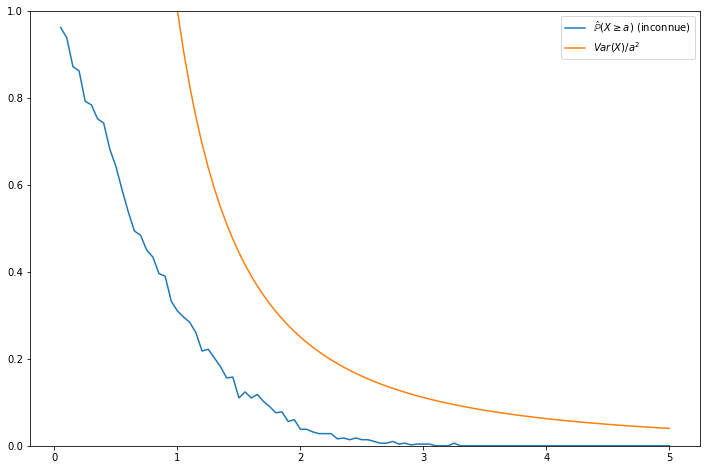

In [27]:
import matplotlib.pyplot as plt

variance = 1
mean = 10

def empirical_probability(a, nb_simulations=100):
    simu = np.abs(np.random.normal(mean, variance, size=nb_simulations)-mean)
    simu = (simu>=a).astype(float)
    return simu.sum()/nb_simulations

x = np.linspace(0.05, 5, 100)
empirical_y = [empirical_probability(_, 500) for _ in x]
concentration_bound = [variance/np.power(_, 2) for _ in x]


plt.figure(figsize=(12, 8))
plt.plot(x, empirical_y, label='$\mathbb{\hat{P}}(X\geq a)$ (inconnue)')
plt.plot(x, concentration_bound, label=r'${Var}(X)/a^2$')
plt.legend()
plt.ylim(0, 1)
plt.show()

Notre majorant est potentiellement supérieure à $1$ lorsque $a$ est très petit. Cependant, dans de très nombreux problèmes calculer la déviation d'une variable par rapport à sa moyenne ou sa médiane est très difficile voire impossible. Ces inégalites nous permettent de manipuler un "pire des cas". **Elles jouent un rôle clé en *machine learning*** pour comprendre pourquoi nos modèles marchent dans certains cas et pourquoi certains modèles ne pourront jamais marcher (même s'ils arrivent à faire $0$ erreur sur le jeu d'apprentissage).

### B. *Union bound*

Nous avons tous vu au lycée la formule suivante :

$$\mathbb{P}\big(A\cup B\big)=\mathbb{P}\big(A\big)+\mathbb{P}\big(B\big)-\mathbb{P}\big(A\cap B\big).$$

Si on élimine la probabilité liée à l'intersection, nous avons :

$$\mathbb{P}\big(A\cup B\big)\leq\mathbb{P}\big(A\big)+\mathbb{P}\big(B\big)$$


De manière plus générale, imaginons une famille d'évènements $A_i$, $i\leq N$, tels que $\forall i\leq N$, nous avons $\mathbb{P}(A_i)\leq K$ (la probabilité est majorée par une quantité $K$). Nous avons alors l'inégalité suivante :

$$\mathbb{P}\big(\cup_i A_i\big)\leq \sum_i \mathbb{P}\big(A_i\big)\leq \sum_i K\leq KN.$$

C'est ce qu'on appelle un *union bound* : on majore grâce à une inégalité liée à l'union.

### C. *Reverse union bound*

Soient $A$ et $B$ deux évènements. De manière étudiante, nous avons&nbsp;:

$$\mathbb{P}\big(\bar{A}\big)=1-\mathbb{P}\big(A\big)$$

Le *union bound* permettait de majorer l'union d'évènements. Le *reverse union bound* permet de minorer la probabilité de l'intersection d'évènements. Nous retrouvons cette formule de la manière suivante&nbsp;:

$$\begin{aligned}
\mathbb{P}\big(A\cap B\big)&=1-\mathbb{P}\big(\overline{A\cap B}\big)\\
&=1-\mathbb{P}\big(\overline{A}\cup\overline{B}\big)\\
&\geq 1-\Big(\mathbb{P}\big(\overline{A}\big)+\mathbb{P}\big(\overline{B}\big)\Big)
\end{aligned}$$

De manière plus générale, imaginons une famille d'évènements $A_i$, $i\leq N$, tels que $\forall i\leq N$, nous avons $\mathbb{P}(\overline{A_i})\leq K$ (la probabilité est majorée par une quantité $K$). Nous avons alors l'inégalité suivante :

$$\mathbb{P}\big(\cap_i A_i\big)\geq 1- \Big(\sum_i \mathbb{P}(\overline{A_i})\Big)\geq 1-\sum_i K\geq 1-KN$$

## II. En supposant $|\mathcal{H}|<\infty$

### A. Aucune hypothèse sur $\eta$

Commençons par un commentaire sur une autre inégalité très souvent utilisée.

Soit une famille de fonctions $\mathcal{H}$ de $\mathcal{X}$ dans $\mathcal{Y}$ telle que $|\mathcal{H}|<\infty$. Et soit $h\in\mathcal{H}$. Nous avons défini le risque et le risque empirique notés respectivement $L$ et $L_n$. La probabilité que nous souhaiterions voir la plus petite possible est $\mathbb{P}\big(|L_n(h)-L(h)|>\epsilon)$. Nous pouvons la majorer grâce à l'[inégalité d'Hoeffding](https://fr.wikipedia.org/wiki/Inégalité_de_Hoeffding)&nbsp;: 

$$\mathbb{P}\big(|L_n(h)-L(h)|>\epsilon) \leq 2 e^{-2\epsilon^2n}.$$

Cela nous dit que la probabité que notre estimateur empirique s'écarte de plus de $\epsilon$ de son espérance décroît exponentiellement vite lorsque la taille du jeu de données augmente ! 

Cependant, pour pouvoir garantir que l'apprentissage se fera bien (i.e. qu'on choisira un bon minimiseur du risque empirique), nous devons majorer la probabilité que TOUTES les fonctions soient bien estimées. 


**<span style='color:blue'> Théorème</span>** 
Soit $\mathcal{H}$ une classe de fonctions de $\mathcal{X}$ dans $\mathcal{Y}$ et $n$ la taille de notre jeu de données. Nous avons&nbsp;:

$$\mathbb{P}\big(\sup_{h\in\mathcal{H}} |L_n(h)-L(h)|>\epsilon\big)\leq |\mathcal{H}|2 e^{-2\epsilon^2n}$$



 ----
**<span style='color:orange'> Preuve</span>** 
$$\begin{aligned}
\mathbb{P}\big(\sup_{h\in\mathcal{H}} |L_n(h)-L(h)|>\epsilon\big)&=\mathbb{P}\big(\cup_{h\in\mathcal{H}} |L_n(h)-L(h)|>\epsilon\big)\\
&\leq \sum_{h\in\mathcal{H}}\mathbb{P}\big(|L_n(h)-L(h)|>\epsilon\big)\\
&\leq |\mathcal{H}|2 e^{-2\epsilon^2n}.
\end{aligned}$$



 ----

C'est un premier résultat fondamental qui nous permet de dire que si $|\mathcal{H}|<\infty$, alors on peut réduire uniformément (i.e. pour toutes fonctions de $\mathcal{H}$) les déviations entre le risque empirique et son espérance et donc que le choix du minimiseur empirique ne sera pas mauvais (pour peu que le jeu de données soit assez grand).

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot(scale):
    H_size = np.linspace(10, 100, 3)
    epsilon = np.linspace(0.04, 0.1, 3)
    n = np.linspace(10, 2000, 100)
    plt.figure(figsize=(12, 8))
    for k in H_size:
        for i, e in enumerate(epsilon):
            plt.plot(n, k*2*np.exp(-2*(e**2)*n), label=r'$\epsilon=${}, $|H|=${}'.format(e, int(k)))
    plt.legend()
    plt.yscale(scale)
    plt.ylim(None if scale == 'log' else 0, 1)
    plt.show()

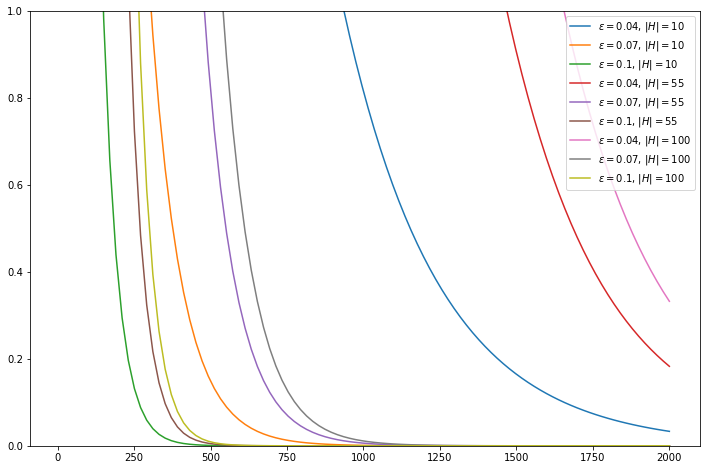

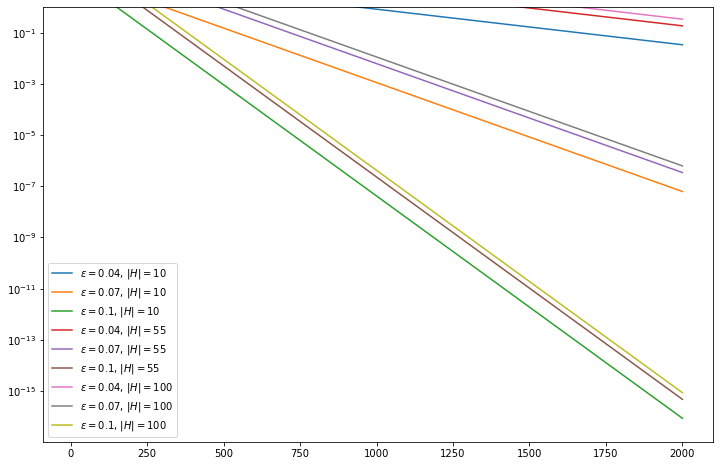

In [5]:
plot('linear')
plot('log')

Nous avons ainsi fixé l'erreur $\epsilon$ et avons observé que la probabilité que la déviation "sup" entre le risque empirique et son espérance soit plus grande que $\epsilon$ décroissait exponentiellement vite. Nous pouvons également prendre une perspective différente en fixant la probabilité et en regardant l'évolution de l'erreur à probabilité fixe&nbsp;:

**<span style='color:blue'> Proposition</span>** 
Soit $\delta>0$ et $|\mathcal{H}|$, alors, avec probabilité au moins $1-\delta$, on a&nbsp;:

$$\sup_{h\in\mathcal{H}} |L_n(h)-L(h)| \leq \sqrt{\frac{\log|\mathcal{H}|+\log\frac{2}{\delta}}{2n}}.$$



 ----
**<span style='color:orange'> Preuve</span>** 
Nous avions&nbsp;:

$$\mathbb{P}\big(\sup_{h\in\mathcal{H}} |L_n(h)-L(h)|>\epsilon\big)\leq |\mathcal{H}|2 e^{-2\epsilon^2n}.$$

Égalons la probabité à droite (i.e. de déviation) avec $\delta$ et résolvons l'inégalité pour $\epsilon$&nbsp;:

$$\begin{aligned}
|\mathcal{H}|2e^{-2\epsilon^2n}&= \delta\\
\Leftrightarrow\ e^{-2\epsilon^2n}&= \frac{\delta}{|\mathcal{H}|2}\\
\Leftrightarrow \epsilon^2&= \frac{\log|\mathcal{H}|+\log\frac{2}{\delta}}{2n}\\
\Leftrightarrow \epsilon&= \sqrt{\frac{\log|\mathcal{H}|+\log\frac{2}{\delta}}{2n}}
\end{aligned}$$

Puisque $\delta$ majore la probabilité d'une déviation plus grande que $\epsilon$, $1-\delta$ minore la probabilité que la déviation soit au plus $\epsilon$. On obtient donc&nbsp;:

$$\sup_{h\in\mathcal{H}} |L_n(h)-L(h)| \leq \sqrt{\frac{\log|\mathcal{H}|+\log\frac{2}{\delta}}{2n}}.$$



 ----
En réutilisant le lemme 1, nous en déduisons le corollaire suivant&nbsp;:

**<span style='color:blue'> Corollaire</span>** 
Soit $\delta>0$ et une classe de fonctions de $\mathcal{X}$ dans $\mathcal{Y}$ notée $\mathcal{H}$. Notons $h_n$ le minimiseur du risque empirique. Nous avons avec probabilité $1-\delta$&nbsp;:

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq 2\sqrt{\frac{\log|\mathcal{H}|+\log\frac{2}{\delta}}{2n}}$$



 ----
Ainsi, le minimiseur du risque empirique n'est pas un mauvais choix si le jeu de données est assez grand et $|\mathcal{H}|<\infty$.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot():
    H_size = np.linspace(100, 1000, 3)
    delta = np.linspace(0.01, 0.05, 3)
    n = np.linspace(10, 1511, 100)
    plt.figure(figsize=(12, 8))
    for k in H_size:
        for i, e in enumerate(delta):
            plt.plot(n, 2*np.sqrt((np.log(k)+np.log(2/e))/(2*n)), label=r'$\delta=${:.2f}, $|H|=${}'.format(e, int(k)))
    plt.legend()
    plt.ylim(0, 1)
    plt.title('Majoration du gap de généralisation')
    plt.show()

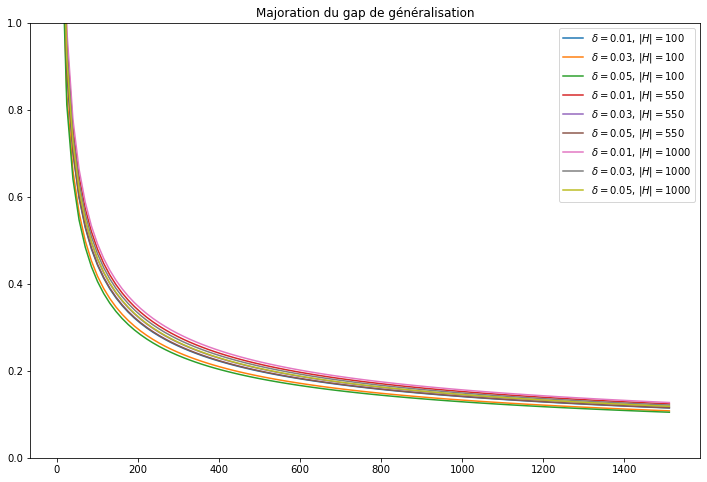

In [41]:
plot()

### B. En supposant $\eta\in\{0, 1\}$

Jusque là, nous n'avions pas d'hypothèse sur $\eta$. Les valeurs que peut prendre $\eta$ influencent grandement la vitesse (en termes de taille de jeu de données) avec laquelle nous allons converger vers la meilleure fonction de notre classe de fonctions. En effet, imaginons que $\eta(x)\approx 0.5$, et notons $Y\sim\mathcal{B}(\eta(x))$ (i.e. une Bernoulli). Nous avons environ une chance sur deux que $Y$ soit la valeur qu'il faille retourner pour minimiser l'erreur et une chance sur deux que ce ne soit pas le cas. Ainsi, nous avons une chance sur deux de favoriser une "mauvaise" fonction. Être autour de $0.5$ est bien sûr un cas extrême, mais cela ralentit la convergence. À l'inverse, si $\eta(x)\in\{0, 1\}$ alors soit notre fonction retourne la bonne valeur et ne fait aucune erreur tout le temps, soit elle retourne une mauvaise valeur et est pénalisée tout le temps. On imagine bien ici que la convergence sera plus rapide.

**<span style='color:blue'> Proposition</span>** Soit $\mathcal{H}$ notre classe de fonctions et $\delta>0$. Supposons $g^\star\in\mathcal{H}$ et $\eta\in\{0, 1\}$. Alors, nous avons avec probabilité $1-\delta$&nbsp;:

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq  \frac{\log |\mathcal{H}|+\log\frac{1}{\delta}}{n}$$



 ----
**<span style='color:orange'> Preuve</span>** 
Tout d'abord, remarquons que puisque $\eta\in\{0, 1\}$ ainsi que $g^\star\in\mathcal{H}$ nous avons nécessairement&nbsp;:

$$\inf_{h\in\mathcal{H}}L(h)=0$$

mais aussi

$$L_n(h_n)=0.$$

Si la meilleure fonction fait toujours $0$ erreur, alors celle qu'on choisira fera $0$ erreur. Notons&nbsp;:

$$\mathcal{H}_b=\{h\in\mathcal{H}:L(h)>\epsilon\}$$

L'ensemble des mauvaises (bad) fonctions de notre classe de fonctions. Ainsi,

$$\begin{aligned}
\mathbb{P}\left(L(h_n)-\inf_{h\in\mathcal{H}}L(h)>\epsilon\right)&=\mathbb{P}\left(L(h_n)>\epsilon\right)\\
&\leq\mathbb{P}\left(\cup_{h\in\mathcal{H}_b} L_n(h)=0\right)
\end{aligned}$$

Il y a une inégalité pour la raison suivante. La probabilité que le minimiseur du risque empirique fasse plus de $\epsilon$ erreurs dépend de la probabilité des mauvaises fonctions à faire $0$ erreur et que ce soit **l'une de celles-là qu'on choisisse**.

Appliquons maintenant le *union bound*&nbsp;:

$$\begin{aligned}
\mathbb{P}\left(\cup_{h\in\mathcal{H}_b} L_n(h)=0\right)\leq \sum_{h\in\mathcal{H}_b}\mathbb{P}\left(L_n(h)=0\right)
\end{aligned}$$

Calculons maintenant&nbsp;:

$$\begin{aligned}
\mathbb{P}\left(L_n(h)=0\right)&=(1-L(h))^n\\
&\leq (1-\epsilon)^n\text{ (car }h\in\mathcal{H}_b\text{)}\\
&\leq (e^{-\epsilon})^n=e^{-\epsilon n}
\end{aligned}$$

Reprenons tout&nbsp;:

$$\begin{aligned}
\mathbb{P}\left(L(h_n)-\inf_{h\in\mathcal{H}}L(h)>\epsilon\right)&\leq \sum_{h\in\mathcal{H}_b}\mathbb{P}\left(L_n(h)=0\right)\\
&\leq \sum_{h\in\mathcal{H}_b}e^{-\epsilon n}\\
&\leq \sum_{h\in\mathcal{H}}e^{-\epsilon n}\\
&\leq |\mathcal{H}|e^{-\epsilon n}
\end{aligned}$$

Soit $\delta>0$, nous avons&nbsp;:

$$\begin{aligned}
|\mathcal{H}|e^{-\epsilon n}&=\delta\\
\Leftrightarrow\ e^{-\epsilon n}&=\frac{\delta}{|\mathcal{H}|}\\
\Leftrightarrow\ \epsilon &= \frac{\log |\mathcal{H}|+\log\frac{1}{\delta}}{n}
\end{aligned}$$

La probabilité de déviation est d'au plus $\delta$. Donc la probabilité de ne pas avoir de déviation est d'au moins $1-\delta$ et nous avons&nbsp;:

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq  \frac{\log |\mathcal{H}|+\log\frac{1}{\delta}}{n}.$$



 ----

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def plot():
    H_size = np.linspace(100, 1000, 2)
    delta = np.linspace(0.01, 0.05, 2)
    n = np.linspace(10, 1511, 100)
    plt.figure(figsize=(12, 8))
    for k in H_size:
        for i, e in enumerate(delta):
            plt.plot(n, 2*np.sqrt((np.log(k)+np.log(2/e))/(2*n)), 
                     label=r'$\delta=${:.2f}, $|H|=${}'.format(e, int(k)))
    for k in H_size:
        for i, e in enumerate(delta):
            plt.plot(n, (np.log(k)+np.log(1/e))/n, linestyle='dashed',
                     label=r'$\eta\in${{0, 1}}, $g^\star\in\mathcal{{H}}$, $\delta=${:.2f}, $|H|=${}'.format(e, int(k)))
    plt.legend()
    plt.ylim(0, 1)
    plt.title('Majoration du gap de généralisation')
    plt.show()

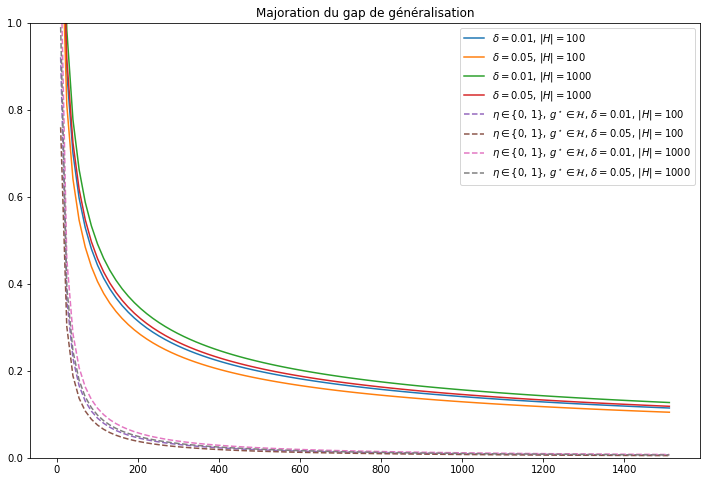

In [66]:
plot()

Dans le premier cas, nous n'avions pas d'hypothèse sur la difficulté de la tâche (i.e. $\eta$). Dans le second, nous avons supposé que les labels étaient calculés de manière déterministe à partir de $x$. Nous avons également supposé que nous pouvions calculer le classifieur de Bayes (i.e. $g^\star\in\mathcal{H}$).


## III. Le cas général : $|\mathcal{H}|=\infty$

Le cas général permet également de conclure pour des cas où le cardinal de $|\mathcal{H}|$ serait fini. 


L'intuition derrière le cas général est qu'au lieu de considérer toutes les fonctions de $\mathcal{H}$, nous n'en considérerons que quelques une. Il s'agit de discrétiser la variable aléatoire $\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|$ de manière à ne considérer que les "valeurs effectives" que notre classe de fonctions peut prendre sur notre jeu de donnée. 

**<span style='color:blue'> Exercice</span>** 1. **Commençons par un exercice afin d'illustrer le point précédent. Soit le jeu de données $S_1=\{(X_1, Y_1)\}$ (toujours dans le cadre d'un problème de classification binaire, i.e. $Y_i\in\{0, 1\}$). Quel est le plus grand nombre de manières de labelliser ce jeu de données indépendamment de $\mathcal{H}$&nbsp;?**

2. **Soit un jeu de données de taille $n$, noté $S_n$. Quel est le plus grand nombre de manières de labelliser ce jeu de données&nbsp;?**



 ----

Intuitivement, on se rend déjà compte (à quelques astuces près) que nous n'avons pas à considérer l'infini. Cependant, $2^n$ reste une quantité trop grosse commme nous le verrons.

**<span style='color:blue'> Exercice</span>** **Soit $\mathcal{X}=\mathbb{R}$ et $S_2=\{(X_1, Y_1), (X_2, Y_2)\}$. Sans perte de généralité supposons $X_1<X_2$. Soit&nbsp;:**

$$\mathcal{H}=\{h(x)=\mathbf{1}\{x>\tau\},\ \tau\in\mathbb{R}\}$$

**C'est l'ensemble des fonctions seuil qui valent $1$ si $x$ est plus grand qu'un paramètre $\tau$ et $0$ sinon. On a déjà vu que le nombre maximum de manières de labelliser un jeu de données de taille $2$ était $4$. Quel est-il *via* la classe de fonctions $\mathcal{H}$ précédente&nbsp;?**



 ----

Nous avons vu que de toute manière nous ne pouvions pas labelliser un jeu de données de taille $n$ de plus de $2^n$ manières différentes et nous avons que que certaines classes de fonctions n'atteignent pas $2^n$. *A priori*, le nombre de valeurs que peut prendre $\mathcal{H}$ sur un jeu de données $S_n$ dépendra du tirage du jeu de données. Pour cela, nous pouvons majorer cette quantité en ne considérant que le "pire des cas". C'est l'objet de la définition suivante&nbsp;:

**<span style='color:blue'> Définition (La fonction de croissance)</span>** 
$$\tau_\mathcal{H}(n)=\max_{\{X_1, ..., X_n\}}|\{h(X_1), ..., h(X_n):\ h\in\mathcal{H}\}|.$$



 ----
C'est le plus grand nombre de manières différentes qu'une classe de fonctions pourrait labéliser un jeu de données de taille $n$. C'est le plus grand nombre configuration de taille $n$ atteignables par notre classe de fonctions.


Maintenant que nous avons donné les éléments de base, nous pouvons rédiger le théorème principal.

**<span style='color:blue'> Théorème</span>** 
Soit $\mathcal{H}$ une classe de fonctions, un jeu de données de taille $n$, $L_n$ et $L$ respectivement le risque empirique et le risque et $\epsilon>0$. Nous avons l'inégalité suivante&nbsp;:

$$\mathbb{P}\Big(\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|>\epsilon\Big)\leq 8 \tau_{\mathcal{H}}(n)e^{-n\epsilon^2/32}$$



 ----
**<span style='color:green'> Preuve (structure)</span>** 
On remarque tout d'abord que si $n\epsilon^2<2$, alors la partie droite de l'inégalité est supérieure à $1$ et l'inégalité est trivialement vraie (i.e. une probabilité vaut au plus $1$). Supposons $n\epsilon^2\geq 2$.

Le reste de la preuve se struture en $3$ étapes&nbsp;:
1. La première étape consiste à remplacer le risque par un risque empirique sur un jeu de test "fantôme". Comparer les performances avec un jeu de test est du même ordre de grandeur qu'avec le vrai risque. Notez que des coefficients multiplicatifs supplémentaires apparaîtront suite à cette manipulation,
2. On va symmétriser avec des signes aléatoire. L'idée est de dire que si un point est dans le test ou le train, il a la même loi de probabilité. Une fois cela dit, on se rend compte que finalement, on peut éliminer le test et ne regarder que la "dynamique" de notre train,
3. On conditionne sur un jeu de donné fixé et on regarde la dynamique de nos "signes aléatoires". On constate qu'on peut majorer cela avec l'inégalité de Hoeffding. Enfin, on se rend compte qu'on peut faire un *union-bound* sur nos $\tau_\mathcal{H}(n)$ fonctions.



 ----

**<span style='color:orange'> Étape 1 : Symétrisation par un échantillon fantôme (échantillon de test).</span>** 
Construisons un jeu de données de test virtuel $S_n^\prime=\{(X_i^\prime, Y_i^\prime)\}_{i\leq n}$ tel que $S_n\sim S_n^\prime$ (iid). Notons $L_n^\prime$ le risque empirique associé à cet échantillon. Supposons $n\epsilon^2\geq 2$, alors nous avons : 

**<span style='color:blue'> Un jeu de test</span>** 
Intuitivement, comparer notre *loss* de *train* avec sa valeur en espérance revient à peu près à la comparer avec la *loss* de *test*.



 ----
$$\mathbb{P}\Big(\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|>\epsilon\Big)\leq 2 \mathbb{P}\Big(\sup_{h\in\mathcal{H}}|L_n(h)-L_n^\prime(h)|>\epsilon/2\Big)$$

Pour voir cela, notons $h^\star$ une fonction telle que $|L_n(h^\star)-L(h^\star)|>\epsilon$ si une telle fonction existe, sinon une fonction fixée au hasard. Nous avons alors :


$$\begin{aligned}
\mathbb{P}\Big(\sup_{h\in\mathcal{H}}&|L_n(h)-L_n^\prime(h)|>\epsilon/2\Big)\geq \mathbb{P}\Big(|L_n(h^\star)-L_n^\prime(h^\star)|>\epsilon/2\Big)\\
&\geq\mathbb{P}\Big(|L_n(h^\star)-L(h^\star)|>\epsilon, |L_n^\prime(h^\star)-L(h^\star)|<\epsilon/2\Big)\\
&=\mathbb{E}\Big[\textbf{1}\{|L_n(h^\star)-L(h^\star)|>\epsilon\}\mathbb{P}\Big(|L_n^\prime(h^\star)-L(h^\star)|<\epsilon/2|Z_1,\ldots, Z_n\Big)\Big]
\end{aligned}$$

où $Z_i=(X_i, Y_i)$. En utilisant l'[Inégalité de Bienaymé-Tchebychev](https://fr.wikipedia.org/wiki/Inégalité_de_Bienaymé-Tchebychev), nous avons :

$$\begin{aligned}
\mathbb{P}\Big(|L_n^\prime(h^\star)-L(h^\star)|<\epsilon/2|Z_1,\ldots, Z_n\Big)&\geq 1-\frac{L(h^\star)(1-L(h^\star))/n}{(\epsilon/2)^2}\\
&\geq 1-\frac{1/4}{n\epsilon^2/4}\geq \frac{1}{2}.
\end{aligned}$$

(car $n\epsilon^2>2$).
Ainsi : 

$$\begin{aligned}\mathbb{E}\Big[\textbf{1}\{|L_n(h^\star)-L(h^\star)|>\epsilon\}\mathbb{P}&\Big(|L_n^\prime(h^\star)-L(h^\star)|<\epsilon/2|Z_1,\ldots, Z_n\Big)\Big]\\
&\geq \mathbb{E}\Big[\textbf{1}\{|L_n(h^\star)-L(h^\star)|>\epsilon\}\Big]\frac{1}{2}\\&=\mathbb{P}\Big(|L_n(h^\star)-L(h^\star)|>\epsilon\Big)\frac{1}{2},\end{aligned}$$

et nous obtenons le résultat voulu.

Cette première étape nous dit que comparer le score empirique de notre risque par rapport à son espérance est à peu près la même chose que le comparer avec un jeu de test. Testons cela au travers d'une petite expérience avec des tirages binomiaux normalisés.



 ----

In [ ]:
import numpy as np

H = [0.25, 0.5, 0.75]
n = 50
epsilon_list = (0.01, 0.1, 0.2)
# on répète l'expérience pour calculer empiriquement la probabilité
size = 1000

for epsilon in epsilon_list:
    print('*' * 20)
    print('Epsilon={}'.format(epsilon))
    results = []
    for h in H:
        Ln = np.random.binomial(n=n, p=h, size=size)/n
        results.append(np.abs(Ln-h)>epsilon)
    empirical_probability_1 = ((np.array(results).sum(axis=0)>0).sum()) / size
    print('* P(sup |L_n-L|>epsilon)=', empirical_probability_1)

    results = []
    for h in H:
        binom = np.random.binomial(n=n, p=h, size=size)/n
        binom_ghost = np.random.binomial(n=n, p=h, size=size)/n
        results.append(np.abs(binom-binom_ghost)>epsilon/2)

    empirical_probability_2 = (np.array(results).sum(axis=0)>0).sum() / size
    print('* P(sup |L_n-L_n\'|>epsilon)=', empirical_probability_2)
    print('* 2xP(sup |L_n-L_n\'|>epsilon)=', 2*empirical_probability_2)

La seconde étape va nous permettre d'éliminer ce jeu fantôme auquel nous n'avons pas accès. Aussitôt mis, aussitôt retiré.

**<span style='color:orange'> Étape 2 : Symétrisation avec des signes aléatoires.</span>** 
Nous avons donc la variable suivante :

$$\sup_{h\in\mathcal{H}}|L_n(h)-L_n^\prime(h)|=\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\textbf{1}\{h(X_i)\neq Y_i\}-\textbf{1}\{h(X_i^\prime)\neq Y_i^\prime\}|$$

Puisque nos variables $\textbf{1}\{h(X_i)\neq Y_i\}$ et $\textbf{1}\{h(X_i^\prime)\neq Y_i^\prime\}$ sont iid, cela revient exactement à 

$$\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\sigma_i(\textbf{1}\{h(X_i)\neq Y_i\}-\textbf{1}\{h(X_i^\prime)\neq Y_i^\prime\})|,$$

où $\sigma_i$ est une variable de Rademacher (i.e. $\mathbb{P}\big(\sigma_i=-1\big)=\mathbb{P}\big(\sigma_i=+1\big)=0.5$).

Nous avons donc : 

$$\mathbb{P}\Big(\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}-\sigma_i\textbf{1}\{h(X_i^\prime\neq Y_i^\prime\})|>\epsilon/2\Big)$$

Et au moins l'un deux deux termes $|\frac{1}{n}\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|$ doit être supérieur à $\epsilon/4$ pour que la somme soit supérieure à $\epsilon/2$ (vérifier par contradiction). Ainsi, en appliquant le *union bound*, nous avons : 

$$\begin{aligned}
\mathbb{P}\Big(\sup_{h\in\mathcal{H}}&\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}-\sigma_i\textbf{1}\{h(X_i^\prime\neq Y_i^\prime\})|>\epsilon/2\Big) \\
&\leq\mathbb{P}\Big(\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4\Big)+\mathbb{P}\Big(\sup_{h\in\mathcal{H}}\frac{1}{n}|\sigma_i\textbf{1}\{h(X_i^\prime\neq Y_i^\prime\}|>\epsilon/4\Big)\\
&=2\mathbb{P}\Big(\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4\Big)
\end{aligned}$$




 ----

**<span style='color:orange'> Étape 3 : Conditionnement</span>** 
Jusqu'ici, nous considérions le jeu de données comme une variable aléatoire. Fixons le et étudions un cas particulier. Notons $z_1, \ldots, z_n=(x_1, y_1),\ldots, (x_n, y_n)\in\mathcal{X}\times\mathcal{Y}$ cette réalisation.


Nous avons donc :

$$\mathbb{P}\Big(\sup_{h\in\mathcal{H}}\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4|Z_1=z_1, \ldots, Z_n=z_n\Big).$$

Le nombre de configurations à tester est justement la fonction de croissance qui nous indique toutes les valeurs que peut prendre notre classe de fonctions $\mathcal{H}$ sur un jeu de données fixé de taille $n$. En appliquant le *union bound* à nouveau, nous obtenons donc&nbsp;:


$$\begin{aligned}
\mathbb{P}\Big(\sup_{h\in\mathcal{H}}&\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4|Z_1, \ldots, Z_n\Big)\\&\leq\tau_\mathcal{H}(n)\sup_{h\in\mathcal{H}}\mathbb{P}\Big(\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4|Z_1, \ldots, Z_n\Big).
\end{aligned}$$

De plus, en appliquant [l'inégalité d'Hoeffding](https://fr.wikipedia.org/wiki/Inégalité_de_Hoeffding) , nous pouvons majorer la probabilité de droite quelque soit la fonction :

$$\mathbb{P}\Big(\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4|Z_1, \ldots, Z_n\Big)\leq 2e^{-n\epsilon^2/32}$$

Cette variable ne dépend pas du conditionnement et nous pouvons donc prendre l'espérance :

$$\begin{aligned}
\mathbb{P}\Big(\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4\Big)&=\mathbb{E}\Big[\mathbb{P}\Big(\frac{1}{n}|\sum_i\sigma_i\textbf{1}\{h(X_i)\neq Y_i\}|>\epsilon/4|Z_1, \ldots, Z_n\Big)\Big] \\
&\leq 2e^{-n\epsilon^2/32}
\end{aligned}$$

**Conclusion.**

En combinait les 3 étapes précédentes, nous obtenons ainsi : 

$$\mathbb{P}\Big(\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|>\epsilon\Big)\leq 8 \tau_{\mathcal{H}}(n)e^{-n\epsilon^2/32}$$



 ----
Des résultats beaucoup plus stricts existent (avec une décroissance plus rapide du point de vue des constantes comme $32$ ici).

**<span style='color:blue'> Exercice ($\star$)</span>** 
**La formule précédente permet de majorer l'évolution de la probabilité d'une déviation d'au moins $\epsilon$ en fonction de $\tau_\mathcal{H}(n)$ ainsi que $n$. Démontrez la variante suivante. Soit $\delta\in[0, 1]$, $\exists K>0$ tel qu'avec probabilité au moins $1-\delta$, nous avons :**

$$\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|< K \sqrt{\frac{\text{ln}\big(\tau_{\mathcal{H}}(n)\big)-\text{ln}\big(\delta\big)}{n}}$$



 ----


## IV. La dimension VC

Le théorème précédent est très intéressant, mais sans hypothèse sur notre classe de fonctions $\mathcal{H}$, nous pourrions très bien avoir, comme nous l'avons vu&nbsp;:

$$\tau_\mathcal{H}(n)=2^n,$$

et cela nous donnerait&nbsp;:

$$\lim_{n\rightarrow\infty}8 \cdot 2^ne^{-n\epsilon^2/32}=\infty,$$

ce qui nous empêcherait de conclure !

Il se trouve que pour certaines classes de fonctions (et nous verrons des exemples), quand bien même $|\mathcal{H}|=\infty$, nous n'aurions pas $\tau_\mathcal{H}(n)=2^n$.

**<span style='color:blue'> Exercice</span>** 
**Soit $\mathcal{X}=\mathbb{R}$, $\mathcal{Y}=\{0, 1\}$ et $\mathcal{H}=\{h_s(x)=\textbf{1}\{x>s\}:\ s\in\mathbb{R}\}$, l'ensemble des fonctions seuil (on retourne $1$ si $x>s$ et $0$ sinon). Montrer que $\tau_\mathcal{H}(2)=3$ et non $2^2=4$.**



 ----


**<span style='color:blue'> Définition (La dimension VC)</span>** 
Nous appelons la dimension VC ou VCdim d'une classe de fonctions $\mathcal{H}$ le plus grand jeu de données $S_n$ tel que $\tau_\mathcal{H}(n)=2^n$. Plus formellement, nous avons :

$$\text{VCdim}(\mathcal{H})=\max_{\tau_{\mathcal{H}}(n)=2^n}n$$



 ----

**<span style='color:blue'> Exercice</span>** 
**Soit $\mathcal{X}=\mathbb{R}$, $\mathcal{Y}=\{0, 1\}$ et $\mathcal{H}=\{h_s(x)=\textbf{1}\{x>s\}:\ s\in\mathbb{R}\}$, l'ensemble des fonctions seuil (on retourne $1$ si $x>s$ et $0$ sinon). Quelle est la dimension VC&nbsp;?**



 ----

L'intérêt clé de cette propriété nous vient du lemme suivant&nbsp;:

**<span style='color:blue'> Lemme de Sauer</span>** 
Soit $\mathcal{H}$ notre classe de fonctions telle que $\text{VCdim}(\mathcal{H})\leq d<\infty$. Nous avons alors $\forall n>0$ :

$$\tau_\mathcal{H}(n)\leq \sum_{i=0}^d{n\choose i}.$$

De plus, si $n>d+1$, alors :

$$\tau_\mathcal{H}(n)\leq\Bigg(\frac{en}{d}\Bigg)^d.$$



 ----
**<span style='color:orange'> Preuve</span>** 
Tout d'abord, nous dirons qu'une classe de fonctions $\mathcal{H}$ **éclate** (*shatters* en anglais) un ensemble de points $C_n=\{(X_1)\}_{i\leq n}$ si toutes les labellisation des points de $C_n$ sont possibles par $\mathcal{H}$.

**Première partie du lemme**

Considérons l'ensemble $\{B\subseteq C_n: \mathcal{H}\text{ éclate } B\}$. C'est l'ensemble des parties de $C_n$ qui sont éclatées par $\mathcal{H}$. Par définition, puisqu'il n'y a pas de jeu de données plus grand que $d$ qui puissent être éclatés par $\mathcal{H}$ (cf. dimension VC), alors on a nécessairement&nbsp;:

$$|\{B\subseteq C_n: \mathcal{H}\text{ éclate } B\}|\leq \sum_{i=0}^d{n\choose i}$$

Notons $\mathcal{H}_C=\{h(X_1), ..., h(X_n):\ h\in\mathcal{H}\}$. Nous allons prouver&nbsp;:

$$|\mathcal{H}_C|\leq |\{B\subseteq C_n: \mathcal{H}\text{ éclate } B\}|$$

 Considérons que $\mathcal{H}$ éclate toujours l'ensemble vide $\emptyset$.

L'argument est par récurence.

Si $n=1$, si $|\mathcal{H}_C|=1$, alors aucune fonction n'éclate $C$. Alors $|\{B\subseteq C_n: \mathcal{H}\text{ éclate } B\}|=1$ grâce à $\emptyset$. Si $|\mathcal{H}_C|=2$, alors le point est éclaté par $\mathcal{H}$ et $|\{B\subseteq C_n: \mathcal{H}\text{ éclate } B\}|=2$ grâce à $\emptyset$ et au point de $C$. L'inégalité est vérifiée pour $n=1$.

Supposons l'inégalité vérifiée $\forall k<n$ et montrons qu'elle l'est alors pour $k=n$. Pour rappel, $C=\{x_1,\ldots, x_n\}$ et notons $C^\prime=\{x_2, \ldots, x_n\}$. Construisons les deux ensembles suivants&nbsp;:

$$\mathbb{Y}_0=\{(y_2, \ldots, y_n): (0, y_2, \ldots, y_n)\in\mathcal{H}_C\lor(1, y_2, \ldots, y_n)\in\mathcal{H}_C\}\text{ ($\lor$ = or)}$$

Il s'agit de toutes les labelisations de $C^\prime$ peu importe le label de $x_1$ .

$$\mathbb{Y}_1=\{(y_2, \ldots, y_n): (0, y_2, \ldots, y_n)\in\mathcal{H}_C\land(1, y_2, \ldots, y_n)\in\mathcal{H}_C\}\text{ ($\land$ = and)}$$

Il s'agit de toutes les labelisations de $C^\prime$ telles que $x_1$ puisse toujours être labellisé $1$ et $0$. On a donc&nbsp;:

$$|\mathbb{Y}_1|+|\mathbb{Y}_0|=|\mathcal{H}_C|$$ 

car $\mathbb{Y}_0$ contient toutes les labellisations de $C^\prime$ et $\mathbb{Y}_1$ double les cas où $x_1$ est double ($1$ et $0$). De plus, on peut remarquer que&nbsp;:

$$\mathbb{Y}_0=\mathcal{H}_{C^\prime},$$

Et puisque l'inégalité est vraie jusqu'à $n-1$, nous avons&nbsp;:

$$|\mathbb{Y}_0|=|\mathcal{H}_{C^\prime}|\leq |\{B\subseteq C^\prime: \mathcal{H}\text{ éclate } B\}|=|\{B\subseteq C: x_1\not\in B\land\mathcal{H}\text{ éclate } B\}|$$

Soit&nbsp;:

$$\mathcal{H}^\prime=\{h\in\mathcal{H}:\ \exists h^\prime\in\mathcal{H}\ s.t.\ (1-h(x_1), h(x_2),\ldots, h(x_n))=(h^\prime(x_1), h^\prime(x_2), \ldots, h^\prime(x_n))\}$$

C'est l'ensemble des fonctions telles qu'il existe une autre fonction en accourd sur tous les points de $C$ sauf le premier. Évidemment, si $\mathcal{H}^\prime$ éclate $B\subseteq C^\prime$, alors il éclate aussi $B\cup x_1$ (par construction de $\mathcal{H}^\prime$. Nous avons de fait $\mathcal{H}^\prime_{C^\prime}=\mathbb{Y}_1$.

Par récurrence, nous avons à noveau&nbsp;:

$$\begin{aligned}|\mathbb{Y}_1|=|\mathcal{H}^\prime_{C^\prime}|&\leq  |\{B\subseteq C^\prime: \mathcal{H}^\prime\text{ éclate } B\}|\\
&=|\{B\subseteq C^\prime: \mathcal{H}^\prime\text{ éclate } B\cup \{x_1\}\}|\\
&=|\{B\subseteq C: x_1\in B\land\mathcal{H}^\prime\text{ éclate } B\}|\\
&\leq |\{B\subseteq C: x_1\in B\land\mathcal{H}\text{ éclate } B\}|
\end{aligned}$$

En résumé, nous avons&nbsp;:

$$\begin{aligned}
|\mathcal{H}_C|=|\mathbb{Y}_0|+|\mathbb{Y}_1|&\leq|\{B\subseteq C: x_1\not\in B\land\mathcal{H}\text{ éclate } B\}|+|\{B\subseteq C: x_1\in B\land\mathcal{H}\text{ éclate } B\}|\\
&=||\{B\subseteq C: \mathcal{H}\text{ éclate } B\}|
\end{aligned}$$

Et donc&nbsp;:

$$\tau_\mathcal{H}(n)\leq \sum_{i=0}^d{n\choose i}.$$

**Seconde partie du lemme**

Nous allons montrer l'inégalité suivante. Soit $n$ et $d$ deux entiers strictement positifs tels que $n>d+1$, alors&nbsp;:

$$\sum_{i=0}^d{n\choose i}\leq \Bigg(\frac{en}{d}\Bigg)^d.$$

Nous allons à nouveau fonctionner par récurrence. Soit $d=1$. On a donc&nbsp;:

$$\sum_{i=0}^d{n\choose i}={n\choose 0}+{n\choose 1}=1+n$$

et&nbsp;:

$$\Bigg(\frac{en}{d}\Bigg)^d=en$$

et on a bien $1+n\leq en$. Supposons que l'inégalité tienne jusqu'à $d$ et montrons $d+1$&nbsp;:

$$\begin{aligned}
\sum_{i=0}^{d+1}{n\choose i}&\leq \Bigg(\frac{en}{d}\Bigg)^d+{n\choose d+1}\\
&= \Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{en}\Bigg)^d\frac{n!}{(d+1)!(n-d-1)!}\right)\\
&= \Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{en}\Bigg)^d\frac{(n-d)}{(d+1)d!}\right)\\
&= \Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{e}\Bigg)^d\frac{n(n-1)\ldots(n-d+1)}{n^d}\frac{(n-d)}{(d+1)d!}\right)\\
&\leq \Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{e}\Bigg)^d\frac{(n-d)}{(d+1)d!}\right)\\
\end{aligned}$$

---

La [formule de Stirling](https://fr.wikipedia.org/wiki/Formule_de_Stirling) donne l'approximation suivante&nbsp;:

$$n!\approx\sqrt{2\pi n}\left(\frac{n}{e}\right)^n.$$

En réalité, nous avons même l'encadrement suivant&nbsp;:

$$\sqrt{2\pi n}\left(\frac{n}{e}\right)^n\leq n! \leq \sqrt{2\pi n}\left(\frac{n}{e}\right)^ne^{\frac{1}{4n}}$$ 

L'approximation initiale est donc un minorant de $n!$.

---

Nous avons donc en appliquant la formule de Stirling à $n!$&nbsp;:

$$\begin{aligned}
\Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{e}\Bigg)^d\frac{(n-d)}{(d+1)d!}\right)&\leq \Bigg(\frac{en}{d}\Bigg)^d\left(1+ \Bigg(\frac{d}{e}\Bigg)^d\frac{(n-d)}{(d+1)\sqrt{2\pi d}\left(\frac{d}{e}\right)^d}\right)\\
&=\Bigg(\frac{en}{d}\Bigg)^d\left(1+\frac{(n-d)}{(d+1)\sqrt{2\pi d}}\right)\\
&=\Bigg(\frac{en}{d}\Bigg)^d\frac{d+1+(n-d)/\sqrt{2\pi d}}{(d+1)}\\
&\leq \Bigg(\frac{en}{d}\Bigg)^d\frac{d+1+(n-d)/2}{(d+1)}\\
&= \Bigg(\frac{en}{d}\Bigg)^d\frac{d/2+1+n/2}{(d+1)}\\
\end{aligned}$$

De plus, par hypothèse, nous avons&nbsp;: $n>d+1\Leftrightarrow n-2\geq d$. Cela nous donne&nbsp;:

$$\begin{aligned}
\Bigg(\frac{en}{d}\Bigg)^d\frac{d/2+1+n/2}{(d+1)}&\leq \Bigg(\frac{en}{d}\Bigg)^d\frac{(n-2)/2+1+n/2}{(d+1)}\\
&=\Bigg(\frac{en}{d}\Bigg)^d\frac{n}{(d+1)}\\
&\leq \Bigg(\frac{en}{d}\Bigg)^d\frac{n}{(d+1)}\frac{1}{e}\\
&= \Bigg(\frac{en}{d}\Bigg)^d\frac{en}{(d+1)}\frac{1}{e}\\
&\leq \Bigg(\frac{en}{d}\Bigg)^d\frac{en}{(d+1)}\frac{1}{(1+1/d)^d}\text{ (rappelez-vous $\lim_{x\rightarrow\infty}(1+1/x)^x=e$ et $(1+1/x)^x$ est croissante)}\\
&=\Bigg(\frac{en}{d}\Bigg)^d\frac{en}{(d+1)}\Bigg(\frac{d}{1+d}\Bigg)^d=\Bigg(\frac{en}{d+1}\Bigg)^{d+1}
\end{aligned}$$



 ----

Ainsi, la fonction de croissance ne croît plus exponentiellement vite mais polynomialement dès qu'on dépasse la dimension VC de notre classe de fonctions. Cela implique que notre majorant de généralisation converge vers $0$, qu'on puisse estimer l'erreur de nos fonctions correctement et donc que le choix du minimiseur du risque empirique est un bon choix : ce résultat (qui est l'agrégation de tous les éléments précédents) est ce qu'on appelle le *théorème fondamental du machine learning*. Ce dernier est détaillé plus bas.

**<span style='color:blue'> Exercice</span>** 
**En reprenant le résultat de l'exercice *($\star$)*, remplacez la fonction de croissance par son majorant issu du Lemme de Sauer lorsque $n>d+1$.**



 ----


**<span style='color:blue'> Exercice</span>** 
**Soit $\mathcal{X}=\mathbb{R}^2$, $\mathcal{Y}=\{0, 1\}$ et $\mathcal{H}$ l'ensemble des classifieurs linéaires de $\mathbb{R}^2$. Démontrer que la dimension VC de $\mathcal{H}$ est au moins $3$.**



 ----


**<span style='color:blue'> Exercice</span>** 
**Soit $\mathcal{H}_{=k}$ l'ensemble des classifieurs qui ne peuvent associer le label $1$ qu'à *exactement* $k$ éléments de $\mathcal{X}$. Trouver la dimension VC. On supposera que $|\mathcal{X}|\geq k$.**



 ----


## V. Une formule générale

Nous avons vu dans le cas où $|\mathcal{H}|<\infty$ que si $\eta\in\{0, 1\}$ et $g^\star\in\mathcal{H}$, alors la convergence était plus rapide car nous avions moins de bruit dans notre jeu de données. C'est bien sûr la même chose lorsque $|\mathcal{H}|=\infty$. Il est d'ailleurs possible de fournir une formule générale qui interpole les deux scénarios.

**<span style='color:blue'> Théorème</span>** 
Soit $\delta>0$, $\mathcal{H}$ notre classe de fonctions, $h_n$ le minimiseur du risque empirique, $\delta>0$. Notons $d$ la dimension VC de $\mathcal{H}$. Alors, $\exists K$ telle qu'avec probabilité $1-\delta$, nous avons&nbsp;:

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq K\left(\sqrt{\inf_{h\in\mathcal{H}}L(h)\frac{d\log n+\log\frac{1}{\delta}}{n}}+\frac{d\log n+\log\frac{1}{\delta}}{n}\right)$$



 ----
On retrouve le terme en racine qui implique une convergence lente. Ce terme tend vers $0$ lorsque l'erreur minimale dans $\mathcal{H}$ tend vers $0$. 

## VI. Un résultat avec une marge (et $|\mathcal{H}|<\infty$)

Nous avons vu que le problème de convergence lente apparaît lorsque $\eta(x)$ est proche de $0.5$. Nous avons propsé une formule interpolatrice qui allait d'une convergence lente à une convergence rapide lorsque la meilleure fonction de notre classe de fonctions se rapprochait de $0$ erreur. Il existe encore une autre manière d'obtenir une convergence rapide.

**<span style='color:blue'> Définition (Marge de Massart)</span>** 
Soit $\nu(x)=\left|\eta(x)-\frac{1}{2}\right|$. On parle de marge de Massart de paramètre $\gamma$ lorsque $\nu(x)\geq \gamma$ preque sûrement.



 ----
Si nous avons une marge de Massart de paramètre $\gamma$ alors soit $\eta(x)\geq \frac{1}{2}+\gamma$, soit $\eta(x)\leq \frac{1}{2}-\gamma$ avec probabilité $1$. On ne peut plus se rapprocher de $0.5$.

**<span style='color:blue'> Théorème (Convergence rapide avec une marge)</span>** 
Soit $\mathcal{H}$ notre classe de fonctions, $\gamma$ le paramètre de notre marge, $h_n$ le minimiseur de notre risque empirique et $\delta>0$. Supposons $g^\star\in\mathcal{H}$. Alors nous avons avec probabilité $1-\delta$&nbsp;:

$$L(h_n)-\inf_{h\in\mathcal{H}}L(h)\leq 2\frac{\log |\mathcal{H}|+\log\frac{1}{\delta}}{\gamma n}$$



 ----
**<span style='color:orange'> Preuve</span>** 
Soit $h\in\mathcal{H}$. Définissons la variable aléatoire suivante&nbsp;:

$$Z_i(h)=\mathbf{1}\{g^\star(X_i)\neq Y_i\}-\mathbf{1}\{h(X_i)\neq Y_i\}.$$

Nous avons par ailleurs&nbsp;:

$$\begin{aligned}
L(h_n)-\inf_{h\in\mathcal{H}}L(h)&=L(h_n)-L(g^\star)\text{ (par hypothèse)}\\
&=\underbrace{L_n(h_n)-L_n(g^\star)}_{\leq 0}+L_n(g^\star)-L_n(h_n)-(L(g^\star)-L(h_n))\\
&\leq \frac{1}{n}\sum_{i=1}^n\left(Z_i(h_n)-\mathbb{E}\left[Z_i(h_n)\right]\right)
\end{aligned}$$

et nous retombons sur un problème où nous souhaitons majorer la déviation entre une variable aléatoire et son espérance. L'astuce est d'utiliser une inégalité de concentration qui s'appuie sur la variance afin d'obtenir un résultat plus fin que l'inégalité d'Hoeffding&nbsp;: l'[inégalité de Bernstein](https://en.wikipedia.org/wiki/Bernstein_inequalities_(probability_theory)).

Comme indiqué, celle-ci s'appuie sur la variance de notre variable aléatoire. Nous avons&nbsp;:

$$\begin{aligned}
\text{Var}[Z_i(h)]&\leq \mathbb{E}[Z_i(h)^2]\\
&=\mathbb{E}[\mathbf{1}\{g^\star(X_i)\neq Y_i\}-2\mathbf{1}\{g^\star(X_i)\neq Y_i\}\mathbf{1}\{h(X_i)\neq Y_i\}+\mathbf{1}\{h(X_i)\neq Y_i\}]\\
&=\mathbb{P}(h(X_i)\neq g^\star(X_i))
\end{aligned}$$

Nous avons donc $\forall h\in\mathcal{H}$&nbsp;:

$$\frac{1}{n}\sum_{i=1}^n \text{Var}[Z_i(h)]\leq \mathbb{P}(h(X)\neq g^\star(X))$$

et notons&nbsp;:

$$\sigma_h^2:=\mathbb{P}(h(X)\neq g^\star(X)).$$

Nous avons via l'inégalité de Bernstein pour $h\in\mathcal{H}$&nbsp;:

$$\mathbb{P}\left(\frac{1}{n}\sum_{i=1}^n Z_i(h)-\mathbb{E}[Z_i(h)]>\epsilon\right)\leq \text{exp}\left(-\frac{n\epsilon^2}{2\sigma_h^2+\frac{2}{3}\epsilon}\right)$$


Calculons maintenant&nbsp;:

$$\begin{aligned}
\text{exp}\left(-\frac{n\epsilon^2}{2\sigma_h^2+\frac{2}{3}\epsilon}\right)&=\frac{\delta}{|\mathcal{H}|}\\
\Leftrightarrow\ \frac{n\epsilon^2}{2\sigma_h^2+\frac{2}{3}\epsilon}&=\log\frac{|\mathcal{H}|}{\delta}\\
\Leftrightarrow\ \epsilon^2&=\frac{2\sigma_h^2\log\frac{|\mathcal{H}|}{\delta}}{n}+\frac{2\epsilon\log\frac{|\mathcal{H}|}{\delta}}{3n}
\end{aligned}$$

Remarquons que $a+b\leq 2\max(a;b)$. Nous avons donc&nbsp;:

$$\begin{aligned}
\epsilon^2&\leq 2\max\left(\frac{2\sigma_h^2\log\frac{|\mathcal{H}|}{\delta}}{n};\frac{2\epsilon\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)\\
\Leftrightarrow\ \epsilon&\leq 2\max\left(\sqrt{\frac{2\sigma_h^2\log\frac{|\mathcal{H}|}{\delta}}{n}};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)
\end{aligned}$$

Ainsi, avec probabilité $1-\frac{\delta}{|\mathcal{H}|}$ pour $h\in\mathcal{H}$ quelconque, nous avons&nbsp;:

$$\frac{1}{n}\sum_{i=1}^n Z_i(h)-\mathbb{E}[Z_i(h)]\leq 2\max\left(\sqrt{\frac{2\sigma_h^2\log\frac{|\mathcal{H}|}{\delta}}{n}};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)$$

En appliquant un *union bound*, nous avons donc qu'avec probabilité $1-\sum_h\frac{\delta}{|\mathcal{H}|}=1-\delta$, $\forall h\in\mathcal{H}$ l'inégalité est vérifiée. C'est en particulier vrai pour le minimiseur du risque empirique&nbsp;:

$$\begin{aligned}
L(h_n)-\inf_{h\in\mathcal{H}}L(h)&\leq \frac{1}{n}\sum_{i=1}^nZ_i(h_n)-\mathbb{E}\left[Z_i(h_n)\right]\\
&\leq 2\max\left(\sqrt{\frac{2\sigma_{h_n}^2\log\frac{|\mathcal{H}|}{\delta}}{n}};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)
\end{aligned}$$

Nous avons de plus&nbsp;:

$$\begin{aligned}
L(h_n)-\inf_{h\in\mathcal{H}}L(h)&=\mathbb{E}[|2\eta(X)-1|\mathbf{1}\{h_n(X)\neq g^\star(X)\}]\text{ (car $g^\star\in\mathcal{H}$)}\\
&\geq 2\gamma \mathbb{P}(h_n(X)\neq g^\star(X)=2\gamma\sigma_{h_n}^2\\
\Leftrightarrow\ \sigma^2_{h_n}&\leq \frac{L(h_n)-\inf_{h\in\mathcal{H}}L(h)}{2\gamma}
\end{aligned}$$

(Pour la première égalité, voir le cours sur le classifieur de Bayes)

Nous en déduisons donc l'inégalité suivante&nbsp;:

$$\begin{aligned}
L(h_n)-\inf_{h\in\mathcal{H}}L(h)&\leq2\max\left(\sqrt{\frac{2\sigma_{h_n}^2\log\frac{|\mathcal{H}|}{\delta}}{n}};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)\\
&\leq 2\max\left(\sqrt{\frac{(L(h_n)-\inf_{h\in\mathcal{H}}L(h))\log\frac{|\mathcal{H}|}{\delta}}{\gamma n}};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)\\
\Leftrightarrow\ L(h_n)-\inf_{h\in\mathcal{H}}L(h)&\leq 2\max\left(\frac{\log\frac{|\mathcal{H}|}{\delta}}{\gamma n};\frac{2\log\frac{|\mathcal{H}|}{\delta}}{3n}\right)=\frac{2\log\frac{|\mathcal{H}|}{\delta}}{\gamma n}
\end{aligned}$$


 ----

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plot():
    H_size = 1000
    delta = np.linspace(0.01, 0.05, 2)
    gamma = np.linspace(0.1, 0.2, 2)
    n = np.linspace(10, 4511, 100)
    plt.figure(figsize=(12, 8))
    for i, e in enumerate(delta):
        plt.plot(n, 2*np.sqrt((np.log(H_size)+np.log(2/e))/(2*n)), 
                 label=r'$\delta=${:.2f}, $|H|=${}'.format(e, int(H_size)))
    for i, e in enumerate(delta):
        for g in gamma:
            plt.plot(n, 2*(np.log(H_size)+np.log(1/e))/(n*g), linestyle='dashed' if g==0.1 else 'dotted',
                     label=r'$\gamma={:.1f}$, $g^\star\in\mathcal{{H}}$, $\delta=${:.2f}, $|H|=${}'.format(
                         g, e, int(H_size)))
    plt.legend()
    plt.ylim(0, 1)
    plt.title('Majoration du gap de généralisation avec hypothèse de marge')
    plt.show()

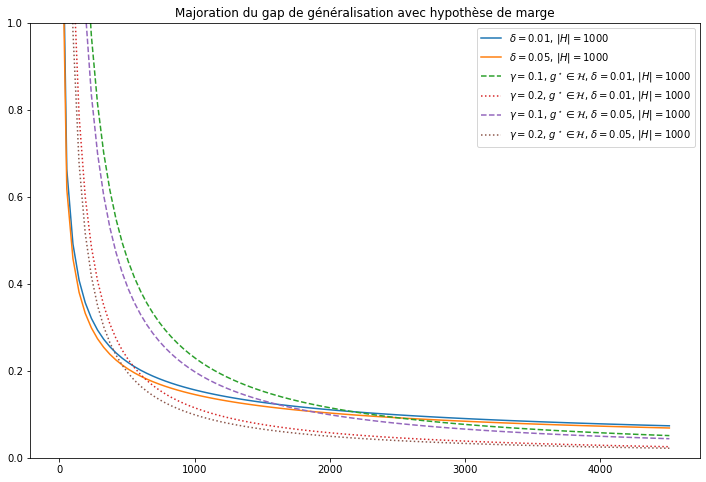

In [84]:
plot()

On observe que ce majorant est plus rapide que lorsqu'on n'a aucune hypothèse, mais si la marge est petite, on part de plus haut et on met un peu plus de temps à "devenir meilleur". Cependant, il existe toujours un moment où une convergence rapide est nécessairement meilleure qu'une convergence lente.

Ces stratégies sont des majorants. On observe que sous l'hypohtèse de marge, le majorant est moins bon que sans hypothèse lors $n$ est petit. En pratique, le majorant sans hypothèse reste valable et nous pourrions avoir une courbe ayant la forme suivante (i.e. on choisit le majorant le plus strict).

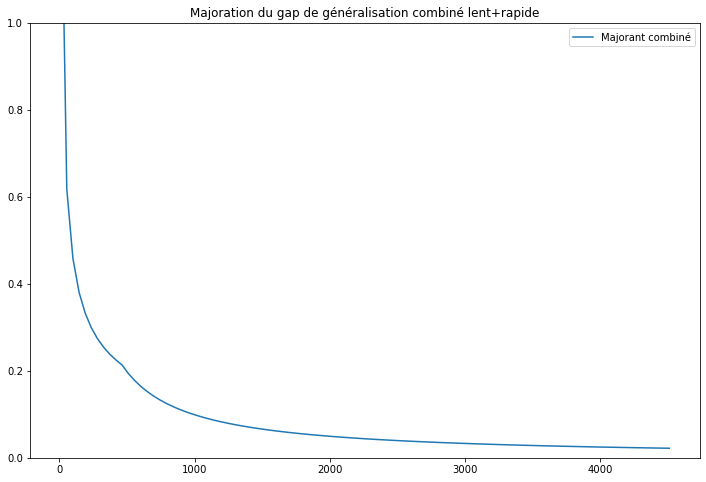

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot():
    H_size = 1000
    delta = 0.05
    gamma = 0.2
    n = np.linspace(10, 4511, 100)
    maj_1 = 2*np.sqrt((np.log(H_size)+np.log(2/delta))/(2*n))
    maj_2 = 2*(np.log(H_size)+np.log(1/delta))/(n*gamma)
    
    maj = np.min(np.stack([maj_1, maj_2]), axis=0)
    
    plt.figure(figsize=(12, 8))
    plt.plot(n, maj, label=r'Majorant combiné')

    plt.legend()
    plt.ylim(0, 1)
    plt.title('Majoration du gap de généralisation combiné lent+rapide')
    plt.show()
plot()

## VII. La *sample complexity*

Nous avons vu dans les sections précédentes que pour une déviation $\epsilon$ fixée nous pouvions majorer l'évolution de la probabilité que notre estimation empirique de l'erreur dévie d'au moins $\epsilon$. Cette probabilité diminue exponentiellement vite lorsque le jeu de données augmente. Nous avons également vu que nous pouvions considérer une probabilité fixée $1-\delta$ et observer les garanties que nous pouvions avoir sur la quantité de déviation relativement à cette probabilité. Nous avons vu notamment le résultat suivant.

---

Soit $\delta\in[0, 1]$, $\exists K>0$ tel que avec probabilité au moins $1-\delta$, nous avons:

$$\sup_{h\in\mathcal{H}}|L_n(h)-L(h)|<K\sqrt{\frac{d\text{ln}\Big(\frac{en}{d}\Big)-\text{ln}\big(\delta\big)}{n}},$$

où $d$ est la dimension VC de notre classe de fonctions.


---

Il existe en réalité une troisième alternative permettant de visualiser ces quantités. Nous pouvons fixer $\epsilon$ et $\delta$ et étudier la taille du jeu de données qu'il faudrait afin de garantir que notre déviation du risque empirique soit inférieure à $\epsilon$ avec probabilité au moins $1-\delta$. La fonction décrivant la *sample complexity* est:

$$m_\mathcal{H}:(0, 1)^2\rightarrow \mathbb{N}.$$

Dans le cadre général, nous voulons donc trouver $n$ tel que la partie à droite de l'inégalité ci-dessus soit égale à au plus $\epsilon$. Dit autrement, nous avons donc:

$$\begin{aligned}
K\sqrt{\frac{d\text{ln}\Big(\frac{en}{d}\Big)-\text{ln}\big(\delta\big)}{n}}&\leq \epsilon\\
\Leftrightarrow K\frac{\sqrt{d\text{ln}\Big(\frac{en}{d}\Big)-\text{ln}\big(\delta\big)}}{\epsilon}&\leq\sqrt{n}\\
\Leftrightarrow K^\prime \frac{d\text{ln}\Big(\frac{en}{d}\Big)-\text{ln}\big(\delta\big)}{\epsilon^2}&\leq n
\end{aligned}$$

## VIII. PAC *learnability* et théorème fondamental du *machine learning*

Les théorèmes précédents montrent des résultats où avec forte probabilité (supérieure à $1-\delta$ pour $\delta$ fixé), nous pouvons garantir que le minimiseur du risque empirique sera proche de la plus petite erreur que nous puissions atteindre dans $\mathcal{H}$. On parle alors de théorie PAC pour *Probably Approximately Correct*. Cela nous mène directement à la définition d'être apprenable au sens de PAC.

**<span style='color:blue'> Définition (Agnostic PAC *learnability*)</span>** 
Soit $\mathcal{H}$ une classe de fonctions de $\mathcal{X}$ dans $\mathcal{Y}$. On dit que $\mathcal{H}$ est "*agnostic* PAC *learnable*" s'il existe une fonction $m_\mathcal{H}:[0, 1]^2\rightarrow\mathbb{N}$ indiquant le nombre de points nécessaires minimum dans notre jeu de données et un algorithme d'apprentissage $\mathcal{A}$ tels que pour toute distribution $\mathbb{P}$ sur $\mathcal{X}\times\mathcal{Y}$ et $\forall \epsilon,\delta$, si $|S_n|\geq m_\mathcal{H}(\epsilon, \delta)$ où $S_n\sim\mathbb{P}^n$ on a avec probabilité au moins $1-\delta$ (sur $S_n$)&nbsp;:

$$L(\mathcal{A}(S_n))\leq \inf_{h^\prime\in\mathcal{H}}L(h^\prime)+\epsilon$$

où $\mathcal{A}(S_n)$ est le résultat de notre algoriothme d'apprentissage sur $S_n$.



 ----
Nous utilisons le terme "agnostique" pour souligner que nous n'avons pas d'hypothèse quant à la capacité de $\mathcal{H}$ à obtenir de bonnes performanceS. On parle de PAC *learnability* (sans "agnostique") si $\inf_{h^\prime\in\mathcal{H}}L(h^\prime)=0$.

La question qui nous vient immédiatement à l'esprit et de déterminer les cas où notre classe de fonctions est effectivement *agnostic PAC learnable*. Le théorème suivante répond à cette question.

**<span style='color:blue'> Théorème fondamental de l'apprentissage statistique</span>** 
Soit $\mathcal{H}$ une classe de fonctions de $\mathcal{X}$ dans $\mathcal{Y}=\{0, 1\}$. Considérons le risque classique $L(h)=\mathbb{P}(h(X)\neq Y)$. Les propositions suivantes sont équivalentes&nbsp;:

1. $\mathcal{H}$ est *agnostic PAC learnable*,
2. $\mathcal{H}$ a une dimension VC finie.



 ----
**<span style='color:green'> Idée de la preuve</span>** 
L'intuition de la preuve va être de trouver non seulement des majorant sur $m_\mathcal{H}$ similaires à ceux que nous avons pu montrer précédement, mais également des minorants (i.e. on ne peut pas faire mieux)&nbsp;:

$$\exists C_1, C_2\text{ (universelles) et }\epsilon,\delta,\ C_1\frac{d+\log\frac{1}{\delta}}{\epsilon^2}\leq m_\mathcal{H}(\epsilon, \delta)\leq C_2\frac{d+\log\frac{1}{\delta}}{\epsilon^2}$$



 ----

Ainsi, si la dimension VC est infinie, le minorant diverge et $\mathcal{H}$ n'est pas PAC learnable. Je vous invite à vous référer à 

*Shalev-Shwartz, Shai, et Shai Ben-David. Understanding Machine Learning: From Theory to Algorithms. Cambridge: Cambridge University Press, 2014.*

pour la preuve détaillée.

## IX. Décidabilité de l'apprentissage

Nous venons de voir que la dimension VC d'une classe de fonctions $\mathcal{H}$ permettait de caractériser l'apprenabilité de cette dernière. Il y a en effet une équivalence mathématique entre la finitude de la dimension VC (un critère combinatoire) et la *PAC leanability*. Ainsi, si la dimension VC est infinie, minimiser le risque empirique ne nous permet pas de faire un bon choix.

De fait, démontrer la finitude de la dimension VC d'une classe de fonctions $\mathcal{H}$ est équivalent à démontrer l'apprenabilité de cette classe. Malheureusement, cela peut être indécidable.

**<span style='color:blue'> Théorème (Indécidabilité dans PAC)</span>** 
Soit $F$ un [système formel](https://fr.wikipedia.org/wiki/Système_formel) récursif (calculable). Il existe des classes de fonctions de $\mathcal{X}$ dans $\mathcal{Y}=\{0, 1\}$ notées $\mathcal{H}$ telles que&nbsp;:

* $\mathcal{H}$ est *PAC learnable* sans que cela puisse être démontré dans $F$ et $F$ est consistent,
* $F$ n'est pas consistent et $\mathcal{H}$ n'est pas *PAC learnable*.



 ----
Pour plus d'informations quant aux théorèmes d'incomplétude de Gödel, voir cette [vidéo](https://www.youtube.com/watch?v=SBwupYwDgHg).

## X. L'approche train-test (ou validation croisée)

Les résultats précédents montrent que plus le modèle (i.e. $\mathcal{H}$) est complexe, plus le risque que notre minimiseur ne soit pas un bon minimieur est grand. Cela vient du fait que plus notre modèle est complexe, plus notre estimation des performances de notre minimiseur risque d'être mauvaise...

Pour cela, il est important de garder un second jeu de données de **test** que nous noterons $T_m$ afin d'évaluer les performances de notre modèle de manière plus stricte.

**<span style='color:blue'> Exercice</span>** 
Soit un jeu de données de test $T_m$ de taille $m$, notre minimiseur empirique $h_n$ et $\delta>0$. Majorez l'erreur du risque empirique de $h_n$ sur $T_m$ avec probabilité $1-\delta$. Servez-vous d'un des résultats précédents.



 ----


## XI. En conclusion
Il y a deux sources de difficulté.

### A. Difficulté épistémique (incertitude du modèle)

La première source de difficulté est celle à laquelle on pense le plus souvent&nbsp;:

* La frontière de décision est vraiment complexe,
* Les données sont en grande dimension,
* Il y a beaucoup de variables et peu de signal et nous ne savons repérer ce dernier,
* etc.

Dans ce cas de figure, à moins d'avoir une connaissance experte, nous devons considérer un grand nombre de fonctions $\mathcal{H}$ (e.g. un grand nombre de paramètres). Ainsi, la dimension VC risque d'être importante et le risque de sur-apprentissage fort. Il nous faut donc un grand jeu de données pour compenser la taille de $\mathcal{H}$ et obtenir un bon modèle.

### B. Difficulté aléatorique (incertitude des données)

La seconde difficulté vient de l'ambiguïté de la tâche. Dans le cadre de la classification binaire, en notant $\eta(x)=\mathbb{P}\big(Y=1|X=x\big)$, on parle d'ambiguïté lorsque $\eta(x)$ est proche de $0.5$. Dans ce cas de figure, il nous faut beaucoup plus de points pour converger vers la meilleure solution de notre classe de fonctions $\mathcal{H}$.

### C. Autres mesures de complexité

La dimension VC mesure la complexité d'une classe de fonctions dans le cadre d'un problème de classification binaire. Cette mesure se généralise au cas multi-classes (voire top-k) avec la dimension de Natarajan et d'autres. Les *fat-shattering coefficients* permettent de quantifier la mesure de complexité d'une classe de fonctions de $\mathcal{X}$ dans $\mathbb{R}$. Ces mesures de complexités permettent de définir une notion d'apprenabilité. Il existe une équivalence entre leur finitude et la capacité à choisir une bonne approximation pour notre problème.

**<span style='color:blue'> Théorème (Apprendre peut être indécidable)</span>** 
Il existe des problèmes de *machine learning* où déterminer ce genre d'équivalences n'est pas possible à moins que le système dans lequel la preuve est faite soit inconsistent (cf. incomplétude de Godël).



 ----